<a href="https://colab.research.google.com/github/AlonVery/Model-s_for_Diploma/blob/main/XG_boost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#XG перевод в RF


In [1]:
!pip install scapy
!pip install mocket
!pip install lime
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 9.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scapy: filename=scapy-2.5.0-py2.py3-none-any.whl size=1444327 sha256=29f1bb7cc239ae2d22fb05abe3f2b01b1acfcf9793a0bb5ffd1d2e0935ae1021
  Stored in directory: /root/.cache/pip/wheels/82/b7/03/8344d8cf6695624746311bc0d389e9d05535ca83c35f90241d
Successfully built scapy
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 1.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.4/341.4 kB 6.9 MB/s eta 0:00:00
  Created wheel for mocket: filename=mocket-3.12.4-py3-none-any.whl size=21899 sha256=b3886380bdb96964b31e1c2997d94b5846639b6c9fe2059400996b1c5ff27022
  Stored in directory: /root/.cache/pip/wheels/a4/97/87/a48fe338ebd5c804536a9bb44df50472f26aed7f67476c9ab7
Successfully built mocket
     ━━━━━━━━━

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from keras.utils import to_categorical
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.ensemble import IsolationForest
from sklearn.compose import ColumnTransformer
from tensorflow.keras.metrics import Accuracy
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.callbacks import LearningRateScheduler
from scipy.cluster.hierarchy import dendrogram
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer, LabelEncoder
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OrdinalEncoder
import pickle
import joblib
from joblib import dump, load
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from keras.utils import to_categorical
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.ensemble import IsolationForest
from sklearn.compose import ColumnTransformer
from tensorflow.keras.metrics import Accuracy
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.callbacks import LearningRateScheduler
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer, LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
from sklearn.model_selection import learning_curve, validation_curve
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve, validation_curve
import numpy as np
import pandas as pd
import seaborn as sns
import joblib
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
import lime
import lime.lime_tabular
import shap
from sklearn.model_selection import train_test_split
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
import plotly.express as px
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import socket
from scapy.all import sniff
from unittest.mock import patch
import random
import pickle
from joblib import dump, load
from xgboost import XGBClassifier

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/stepka123/basic-NL-SA/main/KDDTrain%2B.txt")

columns = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot'
,'num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations'
,'num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate'
,'srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count'
,'dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate'
,'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','attack', 'level'])
df.columns = columns
df.head()


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [4]:
 df = df.drop(['level'], axis=1)
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal
1,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune
2,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal
3,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal
4,0,tcp,private,REJ,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune


In [5]:
# changing attack labels to their respective attack class
def change_label(df):
    df.attack.replace(['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm'],'Dos',inplace=True)
    df.attack.replace(['ftp_write','guess_passwd','httptunnel','imap','multihop','named','phf','sendmail','snmpgetattack','snmpguess','spy','warezclient','warezmaster','xlock','xsnoop'],'R2L',inplace=True)
    df.attack.replace(['ipsweep','mscan','nmap','portsweep','saint','satan'],'Probe',inplace=True)
    df.attack.replace(['buffer_overflow','loadmodule','perl','ps','rootkit','sqlattack','xterm'],'U2R',inplace=True)

In [6]:
change_label(df)
df.attack.unique()
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal
1,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,Dos
2,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal
3,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal
4,0,tcp,private,REJ,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,Dos


In [7]:
le1 = LabelEncoder()
le2 = LabelEncoder()
le3 = LabelEncoder()
le4 = LabelEncoder()

le_protocol_type = le1.fit(df['protocol_type'])
le_service = le2.fit(df['service'])
le_flag = le3.fit(df['flag'])
le_attack = le4.fit(df['attack'])

df['protocol_type'] = le_protocol_type.transform(df['protocol_type'])
df['service'] = le_service.transform(df['service'])
df['flag'] = le_flag.transform(df['flag'])
df['attack'] = le_attack.transform(df['attack'])

In [8]:
y_train= df[['attack']]
X_train= df.drop(labels=['attack'], axis=1)
print('X_train has shape:',X_train.shape,'\ny_train has shape:',y_train.shape)

X_train, X_test, y_train, y_test = train_test_split(X_train,y_train, test_size=0.20, random_state=42)
target_names = ['normal', 'Dos', 'Probe', 'R2L', 'U2R']

X_train has shape: (125972, 41) 
y_train has shape: (125972, 1)


In [9]:
xg = XGBClassifier(n_estimators=100, learning_rate=1, objective='multi:softmax', random_state=42)
xg = xg.fit(X_train, y_train)
xg_pred = xg.predict(X_test)
print(xg_pred)
xg_acc = accuracy_score(y_test, xg_pred)
print(xg_acc)


[0 1 4 ... 0 0 0]
0.9991665012899384


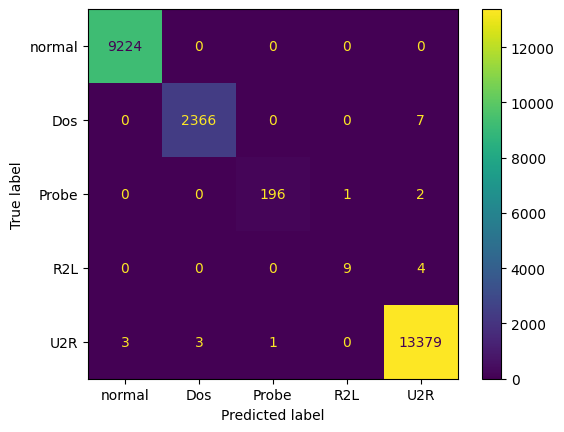

In [10]:
xg_cm = confusion_matrix(y_test, xg_pred)
ConfusionMatrixDisplay(xg_cm,display_labels=target_names).plot()

In [11]:
filename = 'best_model.sav'
pickle.dump(xg, open(filename, 'wb'))

In [12]:
df_test = pd.read_csv('https://raw.githubusercontent.com/stepka123/basic-NL-SA/stepka123-KDD_Dataset/KDDTrain%2B_20Percent.txt')

columns = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot'
,'num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations'
,'num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate'
,'srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count'
,'dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate'
,'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','attack','level'])

df_test.columns = columns
df_test

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25186,0,tcp,exec,RSTO,0,0,0,0,0,0,...,0.03,0.06,0.00,0.00,0.00,0.00,1.0,1.00,neptune,19
25187,0,tcp,ftp_data,SF,334,0,0,0,0,0,...,1.00,0.00,1.00,0.18,0.00,0.00,0.0,0.00,warezclient,12
25188,0,tcp,private,REJ,0,0,0,0,0,0,...,0.05,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21
25189,0,tcp,nnsp,S0,0,0,0,0,0,0,...,0.08,0.06,0.00,0.00,1.00,1.00,0.0,0.00,neptune,20


In [13]:
df_test = df_test.drop(['attack', 'level'], axis=1)

In [14]:
loaded_model = pickle.load(open(filename, 'rb'))

In [15]:
def intrusion_check(packet):
    packet[1] = le_protocol_type.transform([packet[1]])[0]
    packet[2] = le_service.transform([packet[2]])[0]
    packet[3] = le_flag.transform([packet[3]])[0]
    pred = loaded_model.predict(np.reshape(packet, (1, 41)))
    predicted = le_attack.inverse_transform(pred)

    return predicted[0]

In [16]:
def capture_packet(count=float('inf')):
    filtered_packets = []

    def handle_sniffed_packet(packet):
        num = random.randint(0, 11849)
        check = intrusion_check(list(df_test.iloc[num]))
        if check == 'normal':
            filtered_packets.append(packet)
            print(f'Packet Safe, From [{packet.src}] To [{packet.dst}]')
        else:
            print(f'Caution! Found {check}, From [{packet.src}] To [{packet.dst}]')

    # Start capturing packets using sniff
    sniff(prn=handle_sniffed_packet, count=count)

    return filtered_packets

In [17]:
def capture_packet(count=float('inf')):
    filtered_packets = []

    def handle_sniffed_packet(packet):
        num = random.randint(0, 22543)
        check = intrusion_check(list(df_test.iloc[num]))
        if check == 'normal':
            filtered_packets.append(packet)
            print(f'Packet Safe, From [{packet.src}] To [{packet.dst}]')
        else:
            print(f'Caution! Found {check}, From [{packet.src}] To [{packet.dst}]')

    # Start capturing packets using sniff
    sniff(prn=handle_sniffed_packet, count=count)

    return filtered_packets

In [18]:
# Capture 20 packets and receive the safe packets
packets = capture_packet()

Packet Safe, From [02:42:6c:b2:9b:7d] To [02:42:ac:1c:00:0c]
Packet Safe, From [02:42:ac:1c:00:0c] To [02:42:6c:b2:9b:7d]
Caution! Found Dos, From [02:42:6c:b2:9b:7d] To [02:42:ac:1c:00:0c]
Caution! Found Dos, From [02:42:6c:b2:9b:7d] To [02:42:ac:1c:00:0c]
Caution! Found Probe, From [02:42:6c:b2:9b:7d] To [02:42:ac:1c:00:0c]
Caution! Found Probe, From [02:42:ac:1c:00:0c] To [02:42:6c:b2:9b:7d]
Caution! Found Dos, From [02:42:ac:1c:00:0c] To [02:42:6c:b2:9b:7d]
Packet Safe, From [02:42:6c:b2:9b:7d] To [02:42:ac:1c:00:0c]
Caution! Found Dos, From [02:42:6c:b2:9b:7d] To [02:42:ac:1c:00:0c]
Packet Safe, From [02:42:ac:1c:00:0c] To [02:42:6c:b2:9b:7d]
Packet Safe, From [02:42:6c:b2:9b:7d] To [02:42:ac:1c:00:0c]
Packet Safe, From [02:42:6c:b2:9b:7d] To [02:42:ac:1c:00:0c]
Caution! Found Probe, From [02:42:6c:b2:9b:7d] To [02:42:ac:1c:00:0c]
Packet Safe, From [02:42:ac:1c:00:0c] To [02:42:6c:b2:9b:7d]
Caution! Found Dos, From [02:42:ac:1c:00:0c] To [02:42:6c:b2:9b:7d]
Packet Safe, From [02:4

In [19]:
packets[0]

<Ether  dst=02:42:ac:1c:00:0c src=02:42:6c:b2:9b:7d type=IPv4 |<IP  version=4 ihl=5 tos=0x0 len=935 id=59171 flags=DF frag=0 ttl=64 proto=6 chksum=0xf7e7 src=172.28.0.1 dst=172.28.0.12 |<TCP  sport=52640 dport=8080 seq=2004712929 ack=81972386 dataofs=8 reserved=0 flags=PA window=501 chksum=0x5bdf urgptr=0 options=[('NOP', None), ('NOP', None), ('Timestamp', (3323607322, 4790747))] |<Raw  load='GET /socket.io/?EIO=3&sid=byICmsr4he84F6HDAAAA&t=OwvG9KY&transport=polling HTTP/1.1\r\nHost: colab.research.google.com\r\nUser-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/123.0.0.0 Safari/537.36,gzip(gfe)\r\nAccept: */*\r\nAccept-Encoding: gzip, deflate, br, zstd,gzip(gfe)\r\nAccept-Language: ru,en;q=0.9,en-GB;q=0.8,en-US;q=0.7,kk;q=0.6\r\nReferer: https://colab.research.google.com/\r\nSec-Ch-Ua: "Not:A-Brand";v="8", "Chromium";v="123", "Google Chrome";v="123"\r\nSec-Ch-Ua-Arch: "x86"\r\nSec-Ch-Ua-Bitness: "64"\r\nSec-Ch-Ua-Full-Version-List: "No

Accuracy: 0.9991665012899384
Recall: 0.9991665012899384
F1 Score: 0.9991530890628383


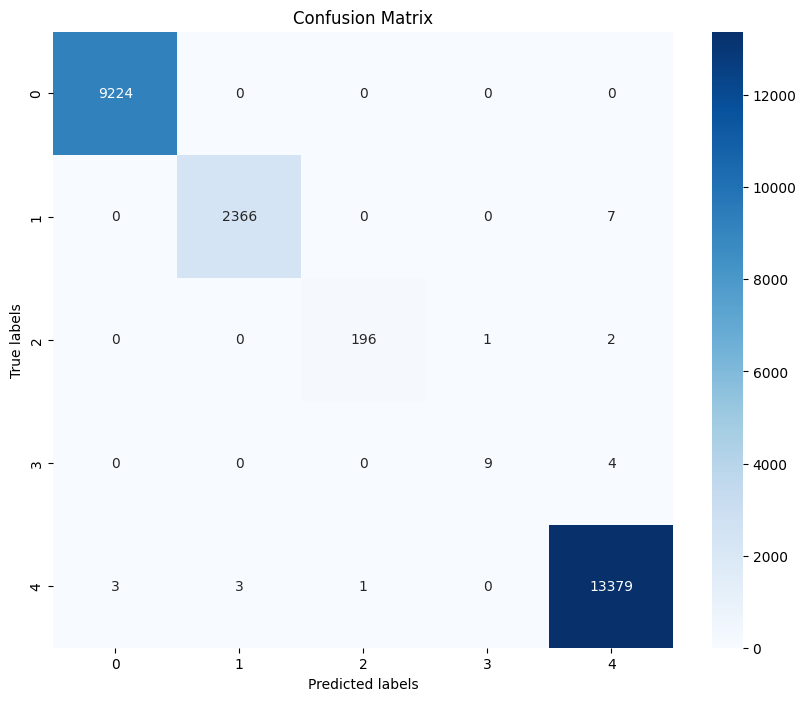

In [24]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Вычисление точности
accuracy = accuracy_score(y_test, xg_pred)
print("Accuracy:", accuracy)

# Вычисление полноты
recall = recall_score(y_test, xg_pred, average='weighted')
print("Recall:", recall)

# Вычисление F1-меры
f1 = f1_score(y_test, xg_pred, average='weighted')
print("F1 Score:", f1)

# Построение матрицы ошибок
cm = confusion_matrix(y_test, xg_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


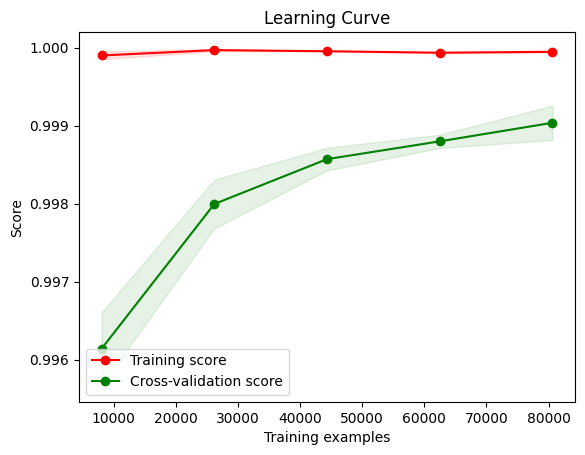

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve, validation_curve

def plot_learning_curve(estimator, X, y, cv=None, train_sizes=np.linspace(.1, 1.0, 5)):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure()
    plt.title("Learning Curve")
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Пример использования
plot_learning_curve(xg, X_train, y_train, cv=5)
plt.show()
